In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
refined_zone_path = "/content/drive/MyDrive/ProjetoAplicadoII/03_refined_zone/bases_processadas/estabelecimento.parquet"

In [ ]:
df_estabelecimento = pd.read_parquet(refined_zone_path)

In [ ]:
df_estabelecimento

,cnpj_basico,cnpj_ordem,cnpj_dv,cnpj_completo,id_matriz_filial,nome_fantasia,situacao_cadastral,cnae_fiscal_principal,tipo_logradouro,cep,uf,correio_eletronico,bairro,situacao_especial,data_inicio_atividade,municipio
0,15164625,0001,66,15164625000166,1,None,2,4929902,RUA,86690000,PR,None,PARQUE RESIDENCIAL PORTAL DAS PRIMAVERAS,None,20120302,COLORADO
1,15164804,0001,01,15164804000101,1,None,2,5611203,QUADRA,73062702,DF,None,SETOR OESTE (SOBRADINHO),None,20120308,BRASILIA
2,15164857,0001,14,15164857000114,1,None,2,5611203,AVENIDA,36046000,MG,ALBCONTABILIDADE@GMAIL.COM,SANTA TEREZINHA,None,20120308,JUIZ DE FORA
3,15165045,0001,93,15165045000193,1,None,2,4543900,RUA,78255000,MT,marisadosanjos@hotmail.com,centro,None,20120308,JAURU
4,15165147,0001,09,15165147000109,1,None,2,4712100,RUA,63460000,CE,marcosmagalhaesguerra@hotmail.com,CENTRO,None,20120308,PEREIRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649696,18092239,0001,02,18092239000102,1,None,2,9491000,RUA,35032520,MG,SECRETARIA@BATISTADOCALVARIO.COM,LOURDES,None,19740702,GOVERNADOR VALADARES
1649697,04509155,0001,09,04509155000109,1,LABORATORIO BIOCLINICO SAO LUIZ,2,8640202,RUA,95580000,RS,None,CENTRO,None,20010607,TRES CACHOEIRAS
1649698,04509174,0001,35,04509174000135,1,SERRA FRIOS,2,4721103,RUA,56906400,PE,None,NOSSA SRA. DA PENHA,None,20010618,SERRA TALHADA
1649699,40550543,0003,69,40550543000369,2,DITEN,2,4753900,AVENIDA,48470000,BA,None,CENTRO,None,19960209,OLINDINA


In [ ]:
cnaes_filtro = [
    6201501, 6201502, 6202300, 6203100,
    2640001, 2651500, 2652300, 2790202,
    7112000, 7119703, 6110801, 6110802
]

In [ ]:
df_estabelecimento["data_inicio_atividade"] = (
    df_estabelecimento["data_inicio_atividade"]
    .astype(str)
    .str.extract(r"(\d{8})")[0]
    .dropna()
    .apply(lambda x: pd.to_datetime(x, format="%Y%m%d", errors="coerce"))
    )
df_estabelecimento["year_start"] = df_estabelecimento["data_inicio_atividade"].dt.year

In [ ]:
df_estabelecimento["year_start"].head(10)

,year_start
0,2012
1,2012
2,2012
3,2012
4,2012
5,2012
6,2012
7,2012
8,2012
9,2012


In [ ]:
df_estabelecimento = df_estabelecimento[df_estabelecimento["cnae_fiscal_principal"].isin(cnaes_filtro)]

In [ ]:
df_estabelecimento["cnae_fiscal_principal"].value_counts()


Top CNAEs:
cnae_fiscal_principal
7112000    9222
6201501    2874
6202300    1643
6203100     804
7119703     562
6201502     293
6110801     136
2651500      70
2790202       9
6110802       9
2652300       3
Name: count, dtype: int64


In [ ]:
def map_cnae(code):
    try:
        prefix = int(str(int(code)).zfill(7)[:2])
    except:
        return "Other"
    if prefix in (62, 63):
        return "Software/Info"
    if prefix == 61:
        return "Telecomunicações"
    if 10 <= prefix <= 33:
        return "Industrialização"
    if prefix == 71:
        return "Serviços de Engenharia"
    return "Other"

df_estabelecimento.loc[:, "sector_heuristic"] = df_estabelecimento["cnae_fiscal_principal"].apply(map_cnae)

In [ ]:
print("Total linhas:", len(df_estabelecimento))
print("Empresas únicas:", df_estabelecimento["cnpj_completo"].nunique())

print("\nTop CNAEs:")
print(df_estabelecimento["cnae_fiscal_principal"].value_counts())

print("\nDistribuição por setor:")
print(df_estabelecimento["sector_heuristic"].value_counts())

print("\nTop UFs:")
print(df_estabelecimento[df_estabelecimento["situacao_cadastral"] == 2]["uf"].value_counts().head(10))

Total linhas: 15625
Empresas únicas: 15625

Top CNAEs:
cnae_fiscal_principal
7112000    9222
6201501    2874
6202300    1643
6203100     804
7119703     562
6201502     293
6110801     136
2651500      70
2790202       9
6110802       9
2652300       3
Name: count, dtype: int64

Distribuição por setor:
sector_heuristic
Serviços de Engenharia    9784
Software/Info             5614
Telecomunicações           145
Industrialização            82
Name: count, dtype: int64

Top UFs:
uf
MG    2658
PR    1807
RJ    1604
SC    1481
RS    1418
BA     854
GO     777
DF     597
CE     585
PE     528
Name: count, dtype: int64


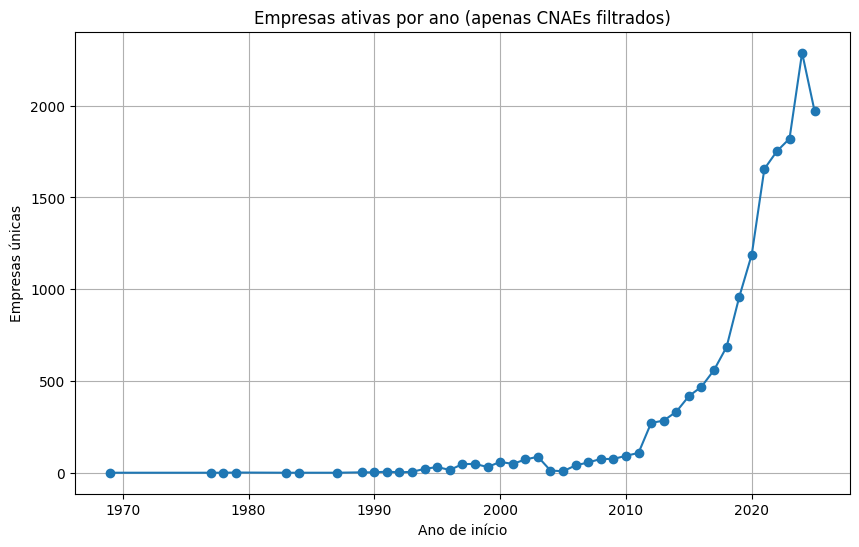

In [ ]:
ts = df_estabelecimento[df_estabelecimento["situacao_cadastral"] == 2].groupby("year_start")["cnpj_completo"].nunique()

plt.figure(figsize=(10,6))
plt.plot(ts.index, ts.values, marker="o")
plt.title("Empresas ativas por ano (apenas CNAEs filtrados)")
plt.xlabel("Ano de início")
plt.ylabel("Empresas únicas")
plt.grid(True)
plt.show()